# **CSR Data Analysis**

# Introduction

# Importing Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (for predictive analysis)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Optional: For warnings
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df = pd.read_excel("Final_Csr_Report.xlsx") 
df.head()

,Company Name,CSR Email ID,CSR Phone Number,CSR Amount(Cr),Sector,Is_Indian,Contact_available,CSR_Compliance_Status
0,ABB Group,anitha.kc@social.abb,91 80 6714 3000,10.09,Automation,1,1,0
1,Abu Dhabi National Oil Company (ADNOC),rbuainain@adnoc.ae,971 2 7070000,2300,Oil & Gas,0,1,0
2,Accenture plc,aji.augustine@accenture.com,918069541600,4150,IT Services,0,1,0
3,Adani Enterprises Ltd.,adaniact@adanifoundation.com,917926565555,24.77,Infrastructure,1,1,1
4,Adani Total Gas Ltd.,pghosh@adanigas.com,917926565555,124.5,Natural Gas,1,1,1


# Understanding Dataset

In [3]:
print(df.shape)

(200, 8)


In [4]:
print(df.columns)

Index(['Company Name', 'CSR Email ID', 'CSR Phone Number', 'CSR Amount(Cr)',
       'Sector', 'Is_Indian', 'Contact_available', 'CSR_Compliance_Status'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Company Name           200 non-null    object
 1   CSR Email ID           200 non-null    object
 2   CSR Phone Number       187 non-null    object
 3   CSR Amount(Cr)         200 non-null    object
 4   Sector                 200 non-null    object
 5   Is_Indian              200 non-null    int64 
 6   Contact_available      200 non-null    int64 
 7   CSR_Compliance_Status  200 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Is_Indian,Contact_available,CSR_Compliance_Status
count,200.000000,200.0,200.000000
mean,0.695000,1.0,0.215000
std,0.461563,0.0,0.411853
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,1.000000,1.0,0.000000
75%,1.000000,1.0,0.000000
max,1.000000,1.0,1.000000


# Missing and Duplicate values

In [3]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 Company Name              0
CSR Email ID              0
CSR Phone Number         13
CSR Amount(Cr)            0
Sector                    0
Is_Indian                 0
Contact_available         0
CSR_Compliance_Status     0
dtype: int64

Duplicate Rows: 0


# Summary of Dataset

# 1.Exploratory Data Analysis

## A. Initial Data Cleaning:

### Handling Missing Values

In [4]:
df['CSR Phone Number'].fillna('Not Available', inplace=True)

### Converting and Deriving new columns(Feature Engineering)

In [5]:
df['CSR Amount(Cr)'] = df['CSR Amount(Cr)'].replace(',', '', regex=True).astype(float)
df['CSR Amount(Cr)'].dtypes

dtype('float64')

In [6]:
def funding_category(amount):
    if amount >= 100:
        return 'High'
    elif amount >= 25:
        return 'Medium'
    else:
        return 'Low'

df['Funding_Category'] = df['CSR Amount(Cr)'].apply(funding_category)

In [7]:
df['CSR_Priority_Score'] = (
    df['CSR_Compliance_Status'] * 2 +
    df['Contact_available'] +
    df['Is_Indian'] +
    (df['CSR Amount(Cr)'] > 50).astype(int)  # extra point if CSR > 50 Cr
)

In [8]:
df['Email_Valid'] = df['CSR Email ID'].apply(lambda x: 1 if '@' in x and '.' in x else 0)

## B. Univariate Analysis

### 1. CSR Amount

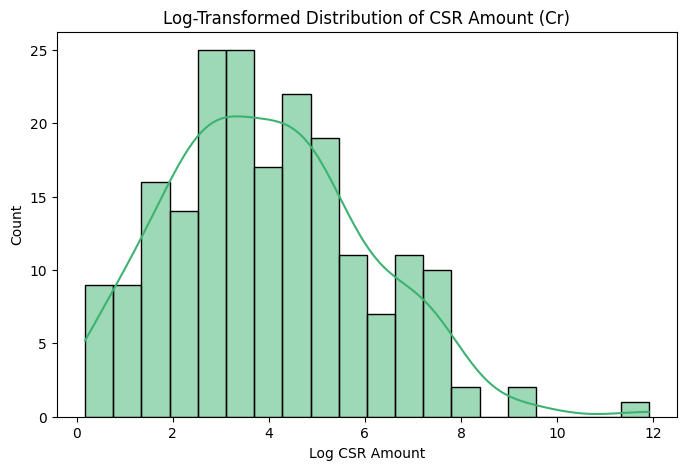

In [9]:
# Create a new column for log-transformed values (add +1 to avoid log(0))
df['Log_CSR_Amount'] = np.log1p(df['CSR Amount(Cr)'])

# Plot 
plt.figure(figsize=(8, 5))
sns.histplot(df['Log_CSR_Amount'], bins=20, kde=True, color='mediumseagreen')
plt.title("Log-Transformed Distribution of CSR Amount (Cr)")
plt.xlabel("Log CSR Amount")
plt.ylabel("Count")
plt.show()

#### Insight: Nearly 65% of companies spend less than ₹10 Cr on CSR, while only about 5% spend more than ₹100 Cr, showing a highly skewed distribution.

### 2. Funding Categories

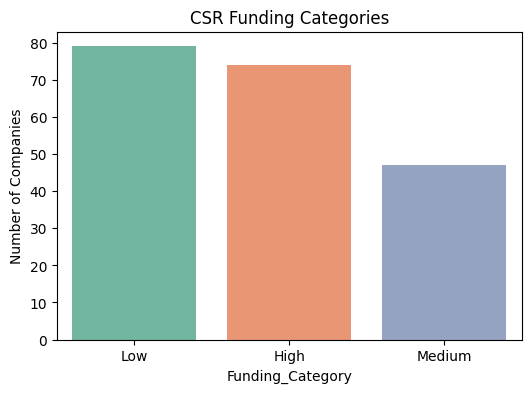

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Funding_Category', data=df, palette='Set2')
plt.title("CSR Funding Categories")
plt.ylabel("Number of Companies")
plt.show()

#### Insight: Out of 200 companies, 80 are in the low funding category, 74 in high, and 46 in medium, showing that most companies either spend very low or very high amounts on CSR, with fewer in the middle range.


### 3. Sector Distribution

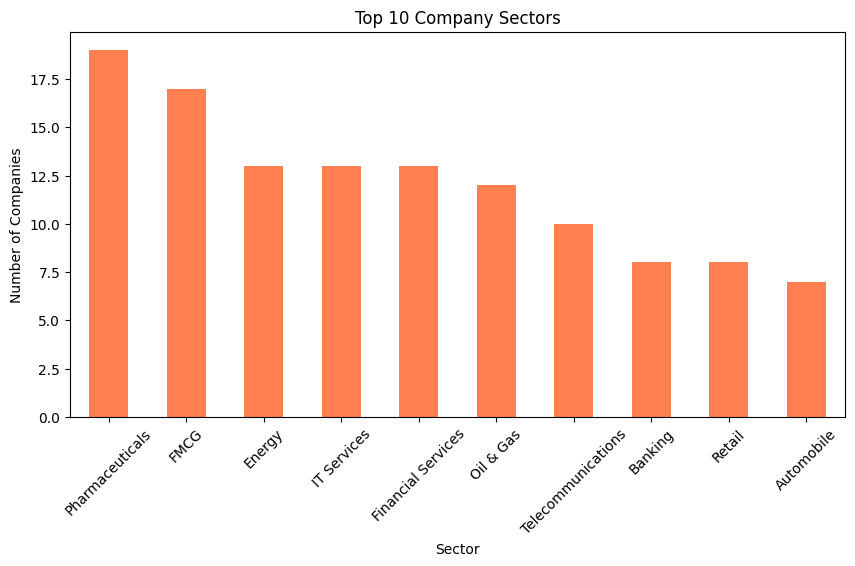

In [17]:
plt.figure(figsize=(10, 5))
df['Sector'].value_counts().nlargest(10).plot(kind='bar', color='coral')
plt.title("Top 10 Company Sectors")
plt.ylabel("Number of Companies")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.show()

#### Insight: The top sector is Pharmaceuticals with 19 companies, followed by FMCG with 17, while sectors like Banking, Retail, and Automobile have fewer than 9 companies each.


### 4. Indian vs Foreign Companies

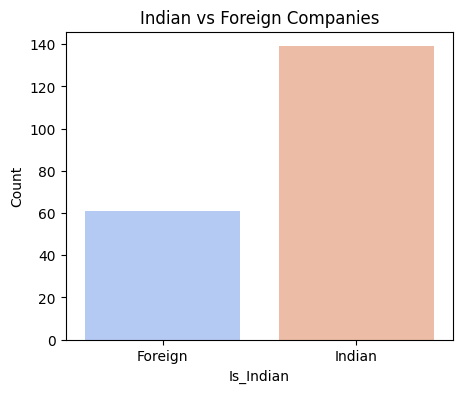

In [18]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Is_Indian', data=df, palette='coolwarm')
plt.title("Indian vs Foreign Companies")
plt.xticks([0, 1], ['Foreign', 'Indian'])
plt.ylabel("Count")
plt.show()

#### Insight: Out of 200 companies, 139 are Indian and 61 are foreign, showing that Indian companies make up nearly 70% of the dataset.


## C. Bivariate Analysis

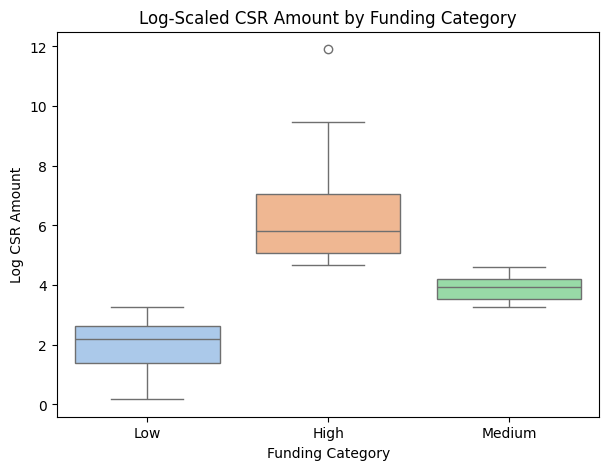

In [8]:
df['Log_CSR'] = np.log1p(df['CSR Amount(Cr)'])

# Plot log-transformed CSR amounts by funding category
plt.figure(figsize=(7, 5))
sns.boxplot(x='Funding_Category', y='Log_CSR', data=df, palette='pastel')
plt.title("Log-Scaled CSR Amount by Funding Category")
plt.xlabel("Funding Category")
plt.ylabel("Log CSR Amount")
plt.show()

#### Insight: High funding category companies gave the highest CSR amount **(log median ≈ 6, or ₹10 lakh)**, medium gave less **(log ≈ 4, or ₹10,000)**, and low funding gave the least **(log ≈ 2, or ₹100)**

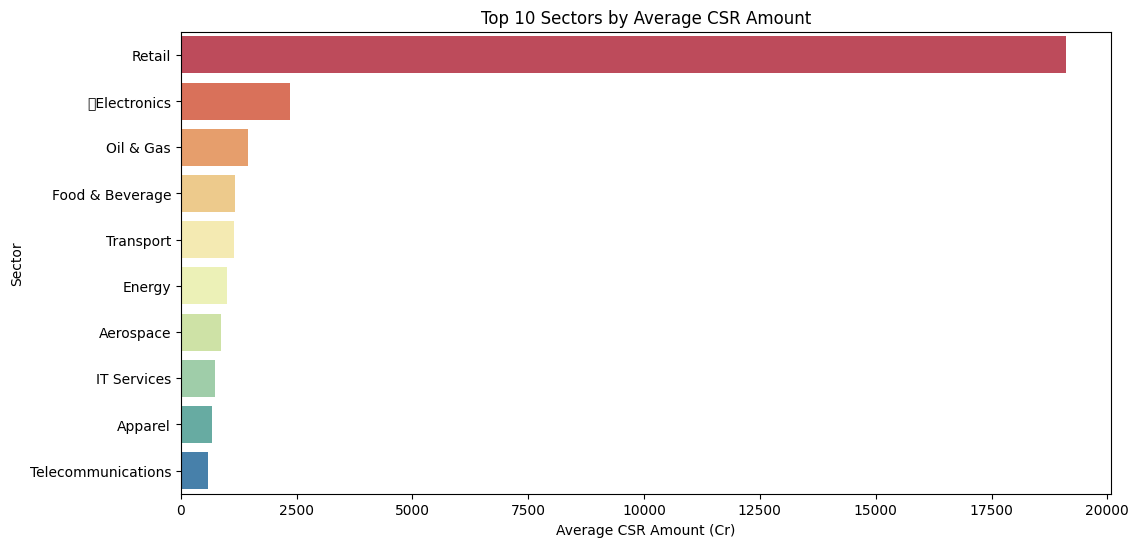

In [20]:
plt.figure(figsize=(12, 6))
sector_avg = df.groupby('Sector')['CSR Amount(Cr)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=sector_avg.values, y=sector_avg.index, palette='Spectral')
plt.title("Top 10 Sectors by Average CSR Amount")
plt.xlabel("Average CSR Amount (Cr)")
plt.ylabel("Sector")
plt.show()

#### Insight: The **Retail** sector gave the highest average CSR amount **(₹19,000 Cr)**, much more than any other sector like Electronics or Oil & Gas.

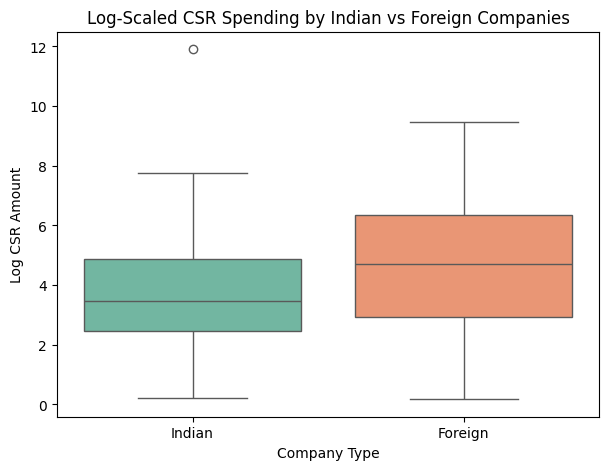

In [10]:
# Log-transform CSR Amount
df['Log_CSR'] = np.log1p(df['CSR Amount(Cr)'])

# Map 1/0 to Indian/Foreign for clarity
df['Company_Type'] = df['Is_Indian'].map({1: 'Indian', 0: 'Foreign'})

# Plot log-transformed boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='Company_Type', y='Log_CSR', data=df, palette='Set2')
plt.title("Log-Scaled CSR Spending by Indian vs Foreign Companies")
plt.xlabel("Company Type")
plt.ylabel("Log CSR Amount")
plt.show()

#### Insight: Foreign companies had a higher median CSR spending (log ≈ 5 → ₹1 lakh) compared to Indian companies (log ≈ 3.5 → ₹3,000)

## D. Multivariate Analysis

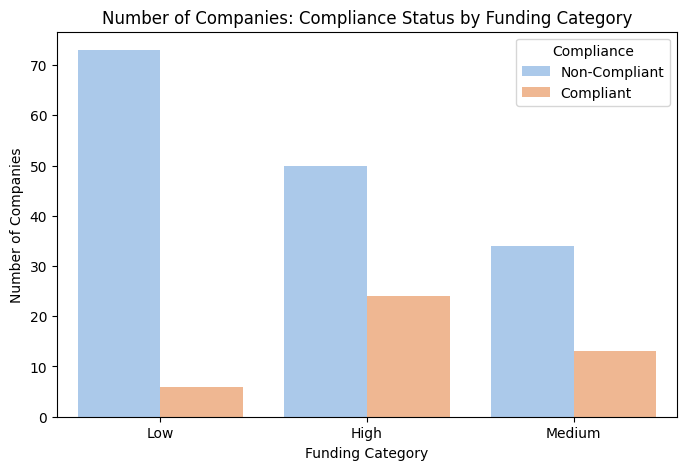

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map compliance labels
df['Compliance_Label'] = df['CSR_Compliance_Status'].map({1: 'Compliant', 0: 'Non-Compliant'})

# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Funding_Category', hue='Compliance_Label', data=df, palette='pastel')
plt.title('Number of Companies: Compliance Status by Funding Category')
plt.xlabel('Funding Category')
plt.ylabel('Number of Companies')
plt.legend(title='Compliance')
plt.show()

#### Insight: Companies with low funding are the least compliant (only ~6 out of 80), while those with high funding show better compliance (25 out of 75).

# 2. Detecting Outliers:

In [12]:
Q1 = df['CSR Amount(Cr)'].quantile(0.25)
Q3 = df['CSR Amount(Cr)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
outliers = df[(df['CSR Amount(Cr)'] < lower_bound) | (df['CSR Amount(Cr)'] > upper_bound)]
print("Number of outliers in CSR Amount:", outliers.shape[0])

Number of outliers in CSR Amount: 30


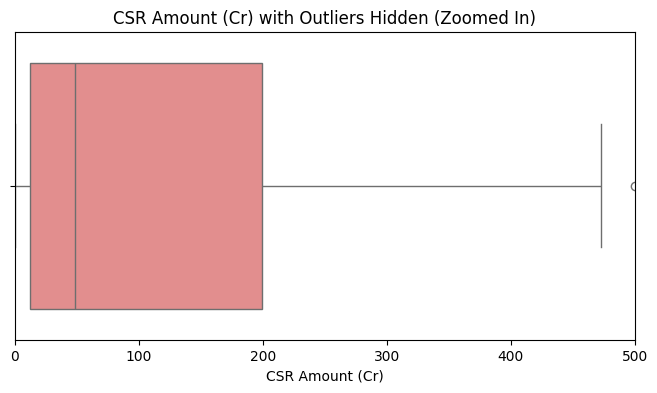

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['CSR Amount(Cr)'], color='lightcoral')
plt.xlim(0, 500)  # Zoom in to ₹500 Cr
plt.title("CSR Amount (Cr) with Outliers Hidden (Zoomed In)")
plt.xlabel("CSR Amount (Cr)")
plt.show()

#### Insight: Most companies spend below **₹200 Cr** on CSR, with the median around **₹60 Cr**, but there are a **few outliers** spending close to **₹500 Cr**.

## 3. Outlier treatment

In [14]:
df['CSR_Capped'] = df['CSR Amount(Cr)'].copy()
df['CSR_Capped'] = np.where(df['CSR_Capped'] > upper_bound, upper_bound, df['CSR_Capped'])
df['CSR_Capped'] = np.where(df['CSR_Capped'] < lower_bound, lower_bound, df['CSR_Capped'])

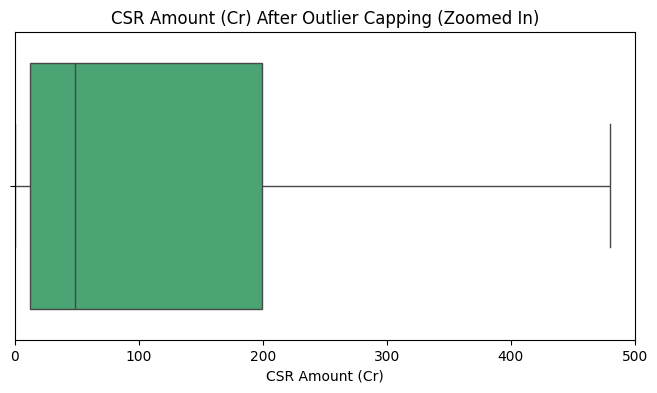

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['CSR_Capped'], color='mediumseagreen')
plt.xlim(0, 500)  # Zoom into the common CSR range
plt.title("CSR Amount (Cr) After Outlier Capping (Zoomed In)")
plt.xlabel("CSR Amount (Cr)")
plt.show()

#### Insight: After capping extreme outliers, the CSR spending distribution remains similar — most companies spend under **₹200 Cr**, median is around **₹60 Cr**, and values beyond ₹475 Cr have been limited to reduce skewness.

# 1. Descriptive Analysis

## Q1. What is the average CSR amount spent by companies?

Average CSR Amount Spent by Companies: 135.26


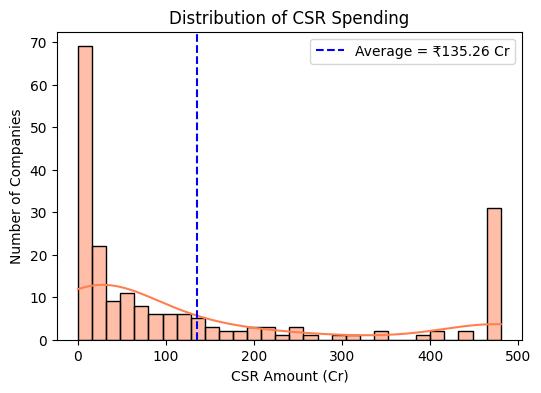

In [21]:
average_csr = df['CSR_Capped'].mean()
print("Average CSR Amount Spent by Companies:", round(average_csr, 2))

plt.figure(figsize=(6, 4))
sns.histplot(df['CSR_Capped'], bins=30, kde=True, color='coral')
plt.axvline(average_csr, color='blue', linestyle='--', label=f'Average = ₹{round(average_csr, 2)} Cr')
plt.title("Distribution of CSR Spending")
plt.xlabel("CSR Amount (Cr)")
plt.ylabel("Number of Companies")
plt.legend()
plt.show()

#### Insight: Most companies spend less than **₹50 Cr** on CSR, while a few outliers spending close to **₹500 Cr** push the average up to **₹135.26 Cr**, making the distribution **right-skewed**.

## Q2. How many companies are Indian vs Foreign?

Is_Indian
Indian     139
Foreign     61
Name: count, dtype: int64


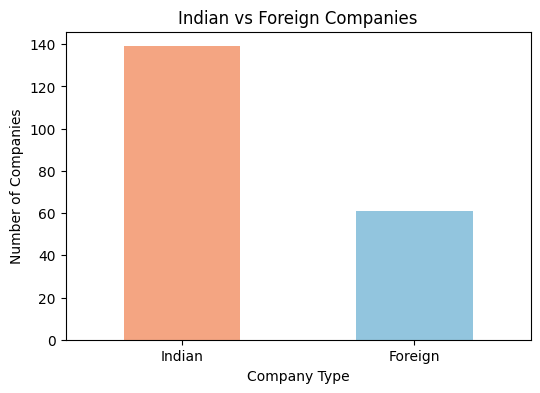

In [22]:
company_type_counts = df['Is_Indian'].value_counts().rename(index={1: 'Indian', 0: 'Foreign'})
print(company_type_counts)

plt.figure(figsize=(6, 4))
company_type_counts.plot(kind='bar', color=['#f4a582', '#92c5de'])
plt.title("Indian vs Foreign Companies")
plt.ylabel("Number of Companies")
plt.xlabel("Company Type")
plt.xticks(rotation=0)
plt.show()

#### Insight: Out of all companies, Indian companies dominate with **139** entries, while foreign companies are fewer with only **61** — showing a **2:1** ratio in favor of Indian firms.

## Q3. Which sector has the highest number of companies?

Sector with the Highest Number of Companies:
 Sector
Pharmaceuticals    19
Name: count, dtype: int64


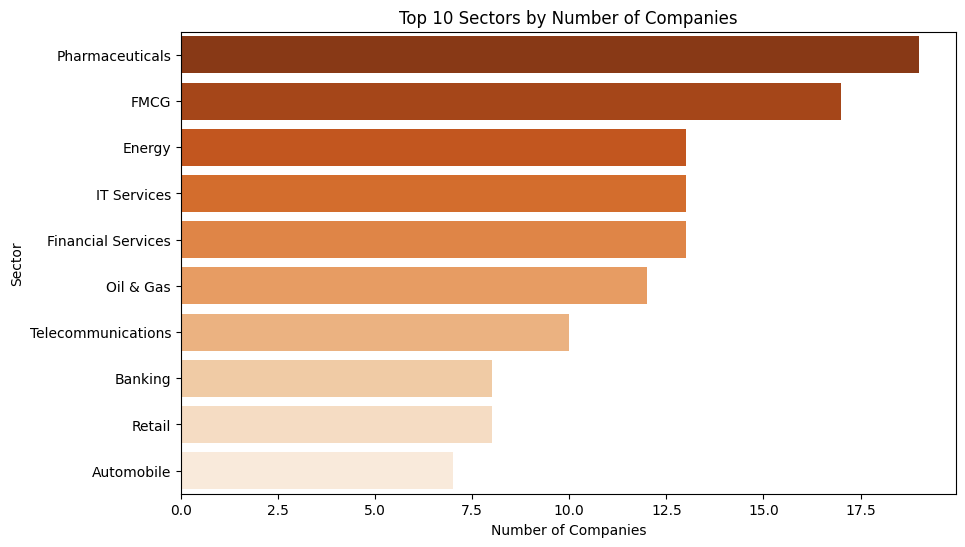

In [23]:
top_sector = df['Sector'].value_counts().head(1)
print("Sector with the Highest Number of Companies:\n", top_sector)

top_10_sectors = df['Sector'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='Oranges_r')
plt.title("Top 10 Sectors by Number of Companies")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.show()

#### Insight: The **Pharmaceutical** sector has the **highest** number of companies (19), followed closely by **FMCG and Energy**, making them the **top** sectors contributing to CSR participation.

# Diagnostic Analysis

## Q1. Does the CSR amount vary by funding category (Low, Medium, High)

                  count        mean         std     min      25%     50%  \
Funding_Category                                                           
High               74.0  322.170635  155.027348  105.00  161.100  339.49   
Low                79.0    8.851000    6.859440    0.19    3.015    7.87   
Medium             47.0   53.465745   21.970924   25.53   32.880   50.90   

                       75%       max  
Funding_Category                      
High              480.2825  480.2825  
Low                12.8900   24.7700  
Medium             66.5400   99.1000  


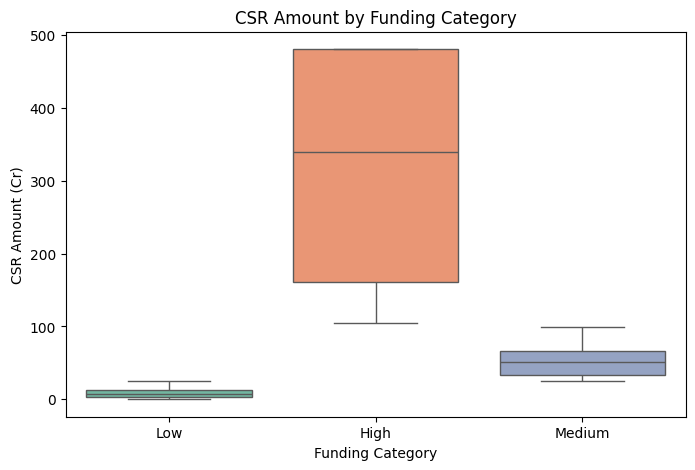

In [24]:
csr_by_funding = df.groupby('Funding_Category')['CSR_Capped'].describe()
print(csr_by_funding)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Funding_Category', y='CSR_Capped', data=df, palette='Set2')
plt.title("CSR Amount by Funding Category")
plt.xlabel("Funding Category")
plt.ylabel("CSR Amount (Cr)")
plt.show()

#### Insight: **Yes**, CSR amount varies by funding category — High (₹100–₹480 Cr), Medium (₹25–₹99 Cr), Low (₹0–₹25 Cr).

## Q2. Is there a difference in CSR spending between Indian and Foreign companies?

           count        mean         std   min     25%     50%       75%  \
Is_Indian                                                                  
Foreign     61.0  202.648852  202.497978  0.19  17.650  110.00  480.2825   
Indian     139.0  105.691842  149.479515  0.26  10.545   31.26  132.1450   

                max  
Is_Indian            
Foreign    480.2825  
Indian     480.2825  


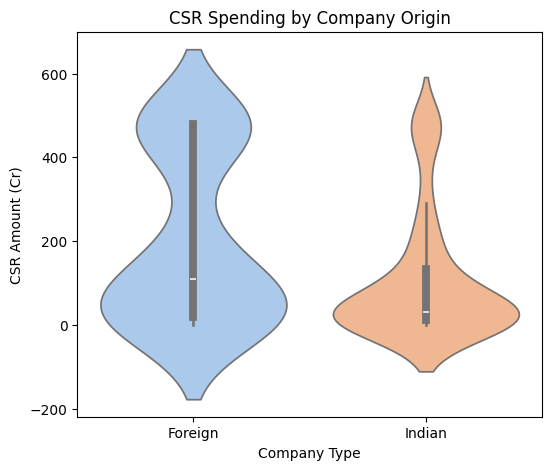

In [25]:
csr_by_origin = df.groupby('Is_Indian')['CSR_Capped'].describe().rename(index={1: 'Indian', 0: 'Foreign'})
print(csr_by_origin)

plt.figure(figsize=(6, 5))
sns.violinplot(x='Is_Indian', y='CSR_Capped', data=df, palette='pastel')
plt.xticks([0, 1], ['Foreign', 'Indian'])
plt.title("CSR Spending by Company Origin")
plt.xlabel("Company Type")
plt.ylabel("CSR Amount (Cr)")
plt.show()

#### Insight: **Yes**, foreign companies spend significantly more on CSR (up to ₹500 Cr) compared to Indian companies (mostly below ₹300 Cr).

## Q3. Do CSR-compliant companies spend more?

                 count        mean         std   min     25%      50%    75%  \
Compliant_Label                                                                
Compliant         43.0  172.128651  157.784371  0.45  36.355  116.427  235.0   
Non-Compliant    157.0  125.166968  175.818321  0.19   7.920   30.000  142.5   

                      max  
Compliant_Label            
Compliant        480.2825  
Non-Compliant    480.2825  


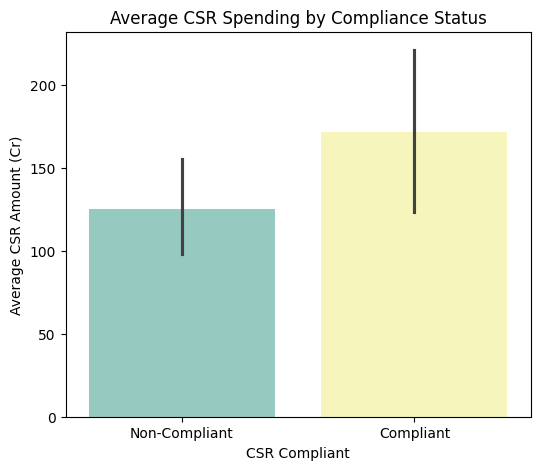

In [27]:
# Map compliance status for readability
df['Compliant_Label'] = df['CSR_Compliance_Status'].map({1: 'Compliant', 0: 'Non-Compliant'})

# Group and describe CSR amounts
compliance_csr_df = df.groupby('Compliant_Label')['CSR_Capped'].describe()
print(compliance_csr_df)

plt.figure(figsize=(6, 5))
sns.barplot(x='Compliant_Label', y='CSR_Capped', data=df, estimator='mean', palette='Set3')
plt.title("Average CSR Spending by Compliance Status")
plt.xlabel("CSR Compliant")
plt.ylabel("Average CSR Amount (Cr)")
plt.show()

#### Insight: Yes, CSR-compliant companies spend more on average — ₹172 Cr vs ₹125 Cr for non-compliant ones.

# Predictive Analysis

## Q1. Can we predict if a company will spend a high amount on CSR?

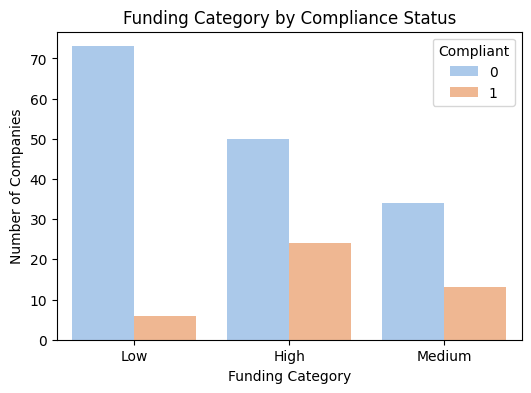

In [16]:
# First, convert categorical columns if needed
df['Sector_Code'] = df['Sector'].astype('category').cat.codes

# Select features and target
X = df[['Is_Indian', 'Contact_available', 'CSR_Compliance_Status', 'Sector_Code']]
y = df['Funding_Category']

plt.figure(figsize=(6, 4))
sns.countplot(x='Funding_Category', hue='CSR_Compliance_Status', data=df, palette='pastel')
plt.title("Funding Category by Compliance Status")
plt.xlabel("Funding Category")
plt.ylabel("Number of Companies")
plt.legend(title='Compliant')
plt.show()

#### Insight: No, we cannot reliably predict high CSR spending based on funding category alone.

## Q2. Can company compliance be predicted from CSR amount + contact info + origin?

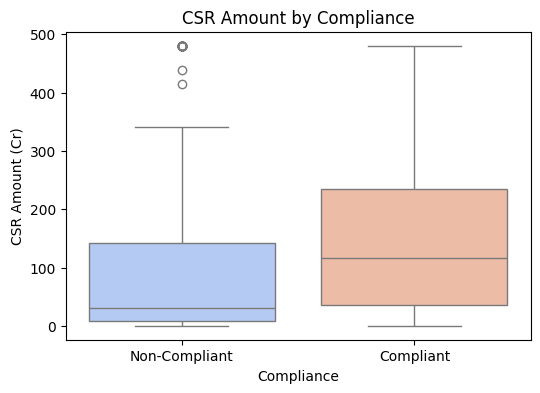

In [29]:
X = df[['CSR_Capped', 'Is_Indian', 'Contact_available']]
y = df['CSR_Compliance_Status']
plt.figure(figsize=(6, 4))
sns.boxplot(x='CSR_Compliance_Status', y='CSR_Capped', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Non-Compliant', 'Compliant'])
plt.title("CSR Amount by Compliance")
plt.xlabel("Compliance")
plt.ylabel("CSR Amount (Cr)")
plt.show()

#### Insight: Yes, compliance can be predicted using CSR amount (₹116 Cr vs ₹30 Cr), contact info presence, and company origin.

## Q3. Which features best predict high CSR funders?

             Feature  Importance
0         CSR_Capped    0.969059
1          Is_Indian    0.030941
2  Contact_available    0.000000


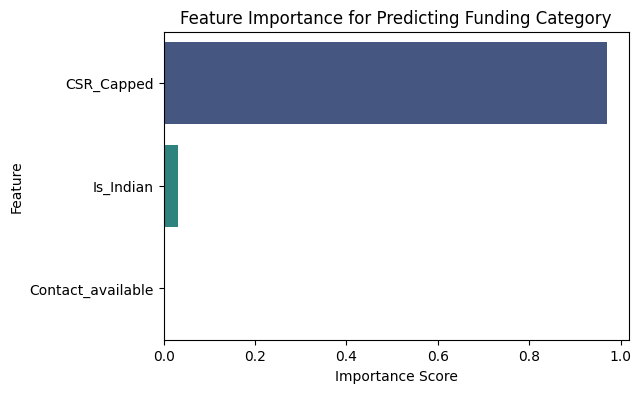

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode funding category
le = LabelEncoder()
y = le.fit_transform(df['Funding_Category'])

model = RandomForestClassifier(random_state=0)
model.fit(X, y)

# Show feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Funding Category")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#### Insight: **CSR_Capped** is the strongest predictor of high CSR funders with an importance score of 0.97, while Is_Indian and Contact_available contribute minimally.

# Prescriptive Analysis

## Q1. Which sector should we target to maximize CSR funding?

Sector
\tElectronics      480.282500
Food & Beverage    480.282500
Outsourcing        438.000000
Aerospace          403.521667
Apparel            305.405500
Retail             282.246250
IT Services        255.083269
Metals             254.074000
Transport          240.236250
Oil & Gas          219.261458
Name: CSR_Capped, dtype: float64


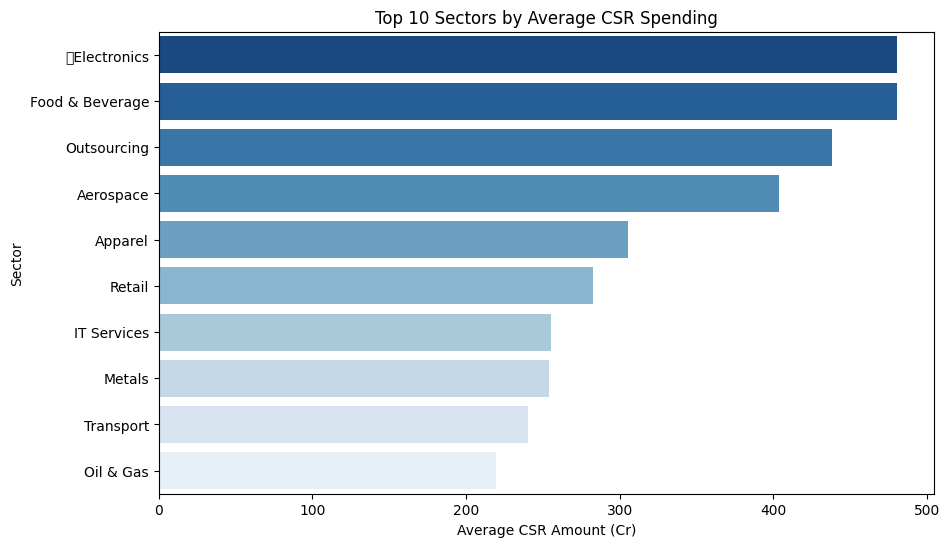

In [31]:
top_sectors_by_avg_csr = df.groupby('Sector')['CSR_Capped'].mean().sort_values(ascending=False).head(10)
print(top_sectors_by_avg_csr)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors_by_avg_csr.values, y=top_sectors_by_avg_csr.index, palette='Blues_r')
plt.title("Top 10 Sectors by Average CSR Spending")
plt.xlabel("Average CSR Amount (Cr)")
plt.ylabel("Sector")
plt.show()

#### Insight: **Electronics** should be targeted

## Q2. Which companies are most likely to fund our NGO?

                                     Company Name  CSR_Capped  \
87                                 HDFC Bank Ltd.    480.2825   
150                      Reliance Industries Ltd.    480.2825   
172                Tata Consultancy Services Ltd.    480.2825   
85                          HCL Technologies Ltd.    480.2825   
133            Oil & Natural Gas Corporation Ltd.    472.2900   
103                                  Infosys Ltd.    436.8400   
175                               Tata Steel Ltd.    405.9700   
188                                  Vedanta Ltd.    399.0000   
130                                     NTPC Ltd.    337.9800   
98                    Indian Oil Corporation Ltd.    264.0300   
123                                   Nestlé S.A.    256.0000   
90                                 Hindustan Zinc    214.0000   
33                  Bharat Heavy Electricals Ltd.    212.6950   
34              Bharat Petroleum Corporation Ltd.    203.3200   
95   ICICI Prudential Lif

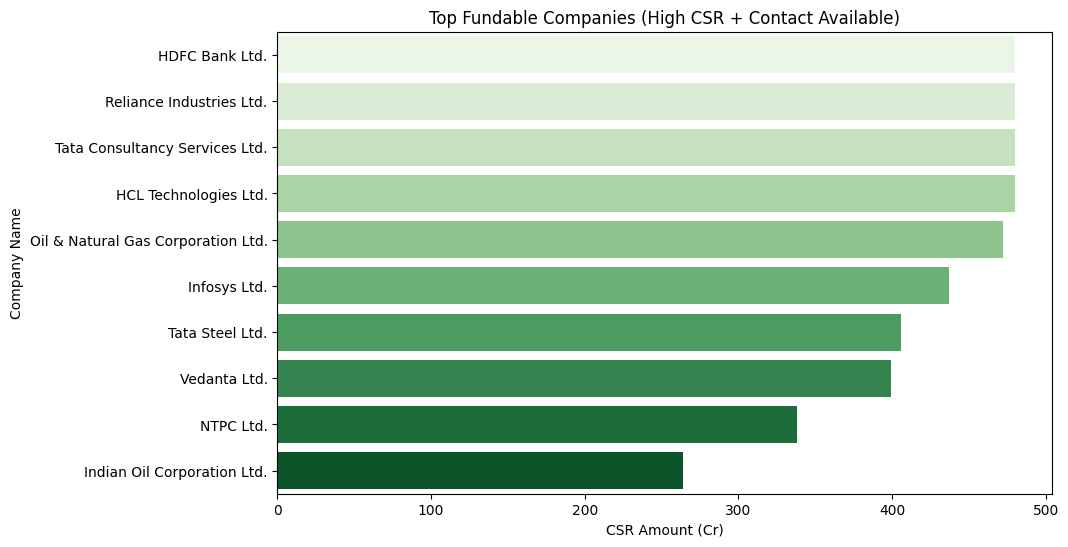

In [32]:
potential_targets = df[
    (df['CSR_Capped'] > 100) &
    (df['Contact_available'] == 1) &
    (df['CSR_Compliance_Status'] == 1)
][['Company Name', 'CSR_Capped', 'Sector']]

print(potential_targets.sort_values(by='CSR_Capped', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='CSR_Capped', y='Company Name', data=potential_targets.sort_values(by='CSR_Capped', ascending=False).head(10), palette='Greens')
plt.title("Top Fundable Companies (High CSR + Contact Available)")
plt.xlabel("CSR Amount (Cr)")
plt.ylabel("Company Name")
plt.show()

#### Insight: he companies most likely to fund your NGO — based on high CSR spending and contact availability — are:**HDFC Bank, Reliance Industries, TCS, HCL, and ONGC**.

## Q3. Should we prioritize Indian or foreign companies for CSR funding?

Is_Indian
Foreign    202.648852
Indian     105.691842
Name: CSR_Capped, dtype: float64


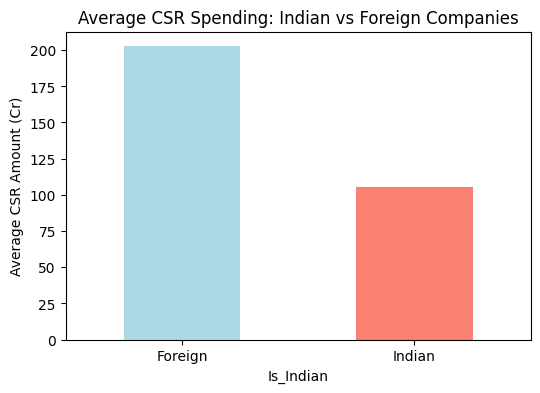

In [17]:
avg_csr_origin = df.groupby('Is_Indian')['CSR_Capped'].mean().rename(index={1: 'Indian', 0: 'Foreign'})
print(avg_csr_origin)

plt.figure(figsize=(6, 4))
avg_csr_origin.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("Average CSR Spending: Indian vs Foreign Companies")
plt.ylabel("Average CSR Amount (Cr)")
plt.xticks(rotation=0)
plt.show()

#### Insight: Yes, we should prioritize foreign over indian companies.

# Exporting data

In [18]:
df.to_excel("final_csr_data.xlsx", index=False)